# Data Exploration

In the presented notebook we will try to explore the data and get some first insights.
* Analyze possible for anomalies
* Analyze tendencies 
* Explore possible collinearity between vairables
* Outliers

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
from matplotlib import pyplot
import altair as alt
from matplotlib.pyplot import figure
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import pycountry
from matplotlib import pyplot as plt

import pygal
from pygal.maps.world import World
from IPython.core.display import display, HTML
matplotlib_axes_logger.setLevel('ERROR')
sns.set_theme(style="white")
plt.rcParams["figure.figsize"] = (20,10)

In [96]:
df=pd.read_csv('/Users/lucas_botella/Downloads/df_covid_processed_FINAL.csv')
del df['Unnamed: 0']

In [97]:
df.head()

,Code,Date,contact_tracing,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,debt_relief,...,month,average_deaths_2015_2019_all_ages,deaths_prev_7,deaths_prev_28,deaths_prev_35,deaths,population,accumulated,R0_prev28,R0
0,AUS,2020-03-08,2.0,1.050000,1.722333,-0.739000,4.977667,-2.089000,7.927667,0.0,...,3,3126.25,153.811500,138.180250,103.791500,145.995875,25364307.0,0.000545,1.331325,0.949187
1,AUS,2020-03-15,2.0,0.761714,1.510143,-1.286000,7.697286,-0.819857,10.567714,0.0,...,3,3126.25,145.995875,193.202250,138.180250,144.432750,25364307.0,0.001306,1.398190,0.989293
2,AUS,2020-03-22,2.0,1.285714,3.367429,-1.081714,9.346857,0.938857,10.877857,0.0,...,3,3126.25,144.432750,141.619125,193.202250,227.591000,25364307.0,0.001865,0.733010,1.575758
3,AUS,2020-03-29,2.0,0.714429,8.979571,-0.387571,5.448857,-2.857143,8.326571,0.0,...,3,3126.25,227.591000,153.811500,141.619125,379.214125,25364307.0,0.002471,1.086093,1.666209
4,AUS,2020-04-05,2.0,-0.898000,15.163286,0.448857,-1.061286,-4.959143,6.959000,0.0,...,4,2564.75,311.104175,119.773825,126.185700,290.073225,25364307.0,0.002943,0.949187,0.932399


In [98]:
df.columns

Index(['Code', 'Date', 'contact_tracing', 'retail_and_recreation',
       'grocery_and_pharmacy', 'residential', 'transit_stations', 'parks',
       'workplaces', 'debt_relief', 'income_support', 'testing_policy',
       'international_travel_controls', 'restrictions_internal_movements',
       'close_public_transport', 'public_information_campaigns',
       'facial_coverings', 'stay_home_requirements', 'restriction_gatherings',
       'cancel_public_events', 'workplace_closures', 'school_closures',
       'Holiday', 'temp', 'prcp', 'doctors_per_1000', 'nurses_per_1000',
       'beds_per_1000', 'number_of_arrivals', 'urban_population',
       'total_vaccinations_per_100', '%youth_unemployment_total',
       'life_expectancy', '%df_population_gr_65',
       'UN Population Division (Median Age) (2017)',
       'Excess mortality P-scores, all ages Prev 35 days',
       'Excess mortality P-scores, all ages Prev 28 days',
       'Excess mortality P-scores, all ages Prev 7 days',
       'Exc

In [99]:
df=df[['Code', 'population', 'Date','retail_and_recreation', 'grocery_and_pharmacy',
       'residential', 'transit_stations', 'parks', 'workplaces',
       'contact_tracing', 'testing_policy', 'international_travel_controls',
       'restrictions_internal_movements', 'close_public_transport',
       'public_information_campaigns', 'facial_coverings',
       'stay_home_requirements', 'restriction_gatherings',
       'cancel_public_events', 'workplace_closures', 'school_closures',
       'debt_relief', 'income_support', 'Holiday', 'temp', 'prcp',
       'doctors_per_1000', 'nurses_per_1000', 'beds_per_1000',
       'number_of_arrivals', 'urban_population', 'total_vaccinations_per_100',
       '%youth_unemployment_total', 'life_expectancy', '%df_population_gr_65',
       'average_deaths_2015_2019_all_ages', 'UN Population Division (Median Age) (2017)', 
       'Excess mortality P-scores, all ages','deaths_prev_7', 'deaths', 'accumulated', 'R0']]
df.describe()

,population,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,contact_tracing,testing_policy,international_travel_controls,...,%youth_unemployment_total,life_expectancy,%df_population_gr_65,average_deaths_2015_2019_all_ages,UN Population Division (Median Age) (2017),"Excess mortality P-scores, all ages",deaths_prev_7,deaths,accumulated,R0
count,2.124000e+03,2167.000000,2167.000000,2167.000000,2167.000000,2164.000000,2167.000000,2167.000000,2167.000000,2167.000000,...,2124.000000,2124.000000,2124.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2124.000000,2167.000000
mean,3.029613e+07,-26.441161,-6.589089,8.958718,-31.155760,22.599068,-25.241327,1.457973,1.996242,2.816468,...,13.281012,79.984804,17.754849,5431.792074,40.892109,15.869040,1131.706213,1147.146204,0.063167,NaN
std,5.452811e+07,23.382347,13.858816,7.579428,20.081817,62.847631,15.575776,0.638391,0.772862,0.987138,...,6.930136,2.889470,4.267911,9906.177287,5.154461,27.500324,3376.861398,3370.596762,0.074429,NaN
min,5.026530e+05,-91.245143,-66.122429,-5.020429,-85.877714,-83.183571,-77.836857,0.000000,0.000000,0.000000,...,4.880000,74.063000,4.928984,57.850000,22.900000,-22.610000,-3894.729750,-3894.729750,0.000000,-inf
25%,5.454073e+06,-42.642857,-12.061143,2.744929,-45.244857,-14.750036,-33.612071,1.000000,2.000000,2.857143,...,8.510000,77.518293,16.172364,1031.125000,39.700001,0.400000,1.704245,3.303713,0.008921,0.362453
50%,1.028545e+07,-23.122571,-3.795714,8.428571,-31.285714,6.540714,-23.836571,2.000000,2.000000,3.000000,...,11.090000,81.324390,19.340463,2131.100000,42.400002,7.020000,111.322200,117.620580,0.031474,0.885563
75%,3.797087e+07,-7.336714,1.938714,13.275714,-15.316357,42.821464,-16.142786,2.000000,3.000000,3.000000,...,16.820000,82.448780,20.336511,5482.900000,43.900002,22.485000,711.321343,716.879725,0.098038,1.320188
max,3.282395e+08,22.510286,27.755000,36.612143,11.327667,400.122571,15.816429,2.000000,3.000000,4.000000,...,35.110001,83.753659,23.012137,74249.625000,47.900002,409.190000,35238.872025,35238.872025,0.397959,inf


In [100]:
df.isna().sum()

Code                                             0
population                                      43
Date                                             0
retail_and_recreation                            0
grocery_and_pharmacy                             0
residential                                      0
transit_stations                                 0
parks                                            3
workplaces                                       0
contact_tracing                                  0
testing_policy                                   0
international_travel_controls                    0
restrictions_internal_movements                  0
close_public_transport                           0
public_information_campaigns                     0
facial_coverings                                 0
stay_home_requirements                           0
restriction_gatherings                           0
cancel_public_events                             0
workplace_closures             

### Correlation Matrix

<AxesSubplot:>

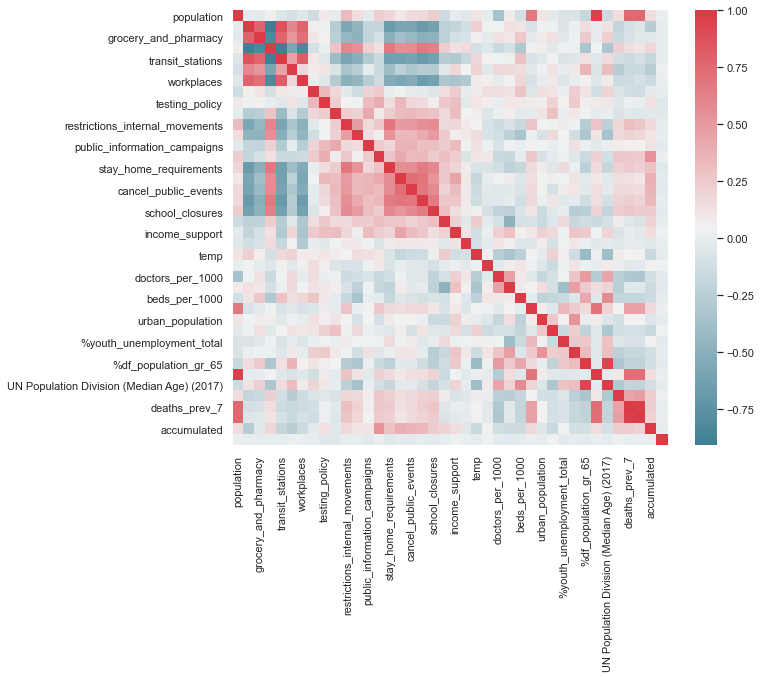

In [101]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

* There is a high multicollinearity between variables, Mobility trends are highly correlated with each other values close to 1
* There is also a high multicollinearity in restrictions, meaning restrictions are applied together
* Even more, there is multicollinearity between mobility trends and restrictions, which is something expected.
* Restrictions that most affect mobility seem to be "stay_at_home_requirements", "restrictions_gatherings", "cancel_public_events", "workplace_closures" and "school_closures"


### R0 Distribution 

Text(0.5, 1.0, 'R0')

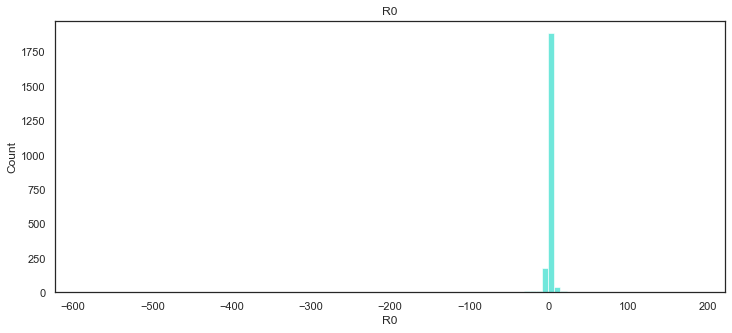

In [102]:
#Removing -inf and infinite
df=df[~df.isin([np.inf, -np.inf]).any(1)]
f, axes = plt.subplots(figsize=(12,5))
sns.histplot(x='R0', data=df, kde=False, bins=100, ax=axes, color='turquoise');
axes.set_title('R0')

In [103]:
df[['R0']].describe()

,R0
count,2162.000000
mean,0.629173
std,16.376271
min,-584.000000
25%,0.362341
50%,0.884592
75%,1.318172
max,183.500000


* R0, our target variable contains a lot of outliers.
* R0 will have to be pre-processed in the modelling stage
* This abnormal values of R0 can be explained by the fact that R0 is calculated as (excess deaths in week n)/(excess deaths in week n-1). What this implies is that if (deaths in week n-1) are very close to 0 the fraction will return abnormal values
* This might be due to anomalies in the collection of data which is deaths being reported not uniformly

## Data fitering on R0 extreme and abnormal values
* R0 is calculated as the division of deaths/deaths_prev_7
* Secondly we remove R0 values smaller than 0 and higher than 8.9 from our dataset. 
It is recorded that R0 in coronavirus ranges from 3.8 to 7 therefore it doesn´t make sense to include values higher than 7 because if any value higher than 7 is recorded it might be due to errors in the data.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7657547/

In [104]:
df=df[~df.isin([np.inf, -np.inf]).any(1)]
df['limit']=5*df['average_deaths_2015_2019_all_ages']/100
df=df[(df['deaths_prev_7']>=df['limit']) & (np.abs(df['R0'])<=7) & (df['R0']>0)]
del df['deaths_prev_7']
del df['limit']
df.sort_values('R0')
df_pca=df.copy()

Text(0.5, 1.0, 'R0')

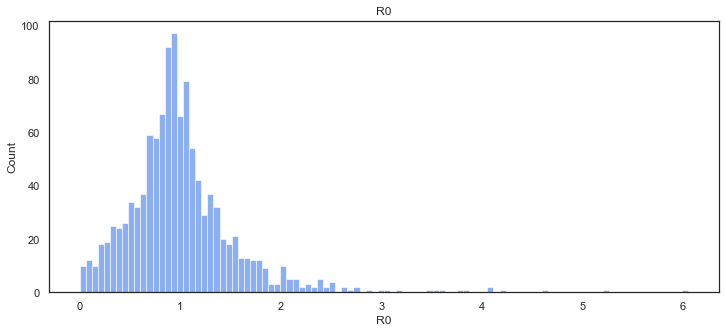

In [105]:
#Removing -inf and infinite
df=df[~df.isin([np.inf, -np.inf]).any(1)]
f, axes = plt.subplots(figsize=(12,5))
sns.histplot(x='R0', data=df, kde=False, bins=100, ax=axes, color='cornflowerblue');
axes.set_title('R0')

### R0 distribution per country 

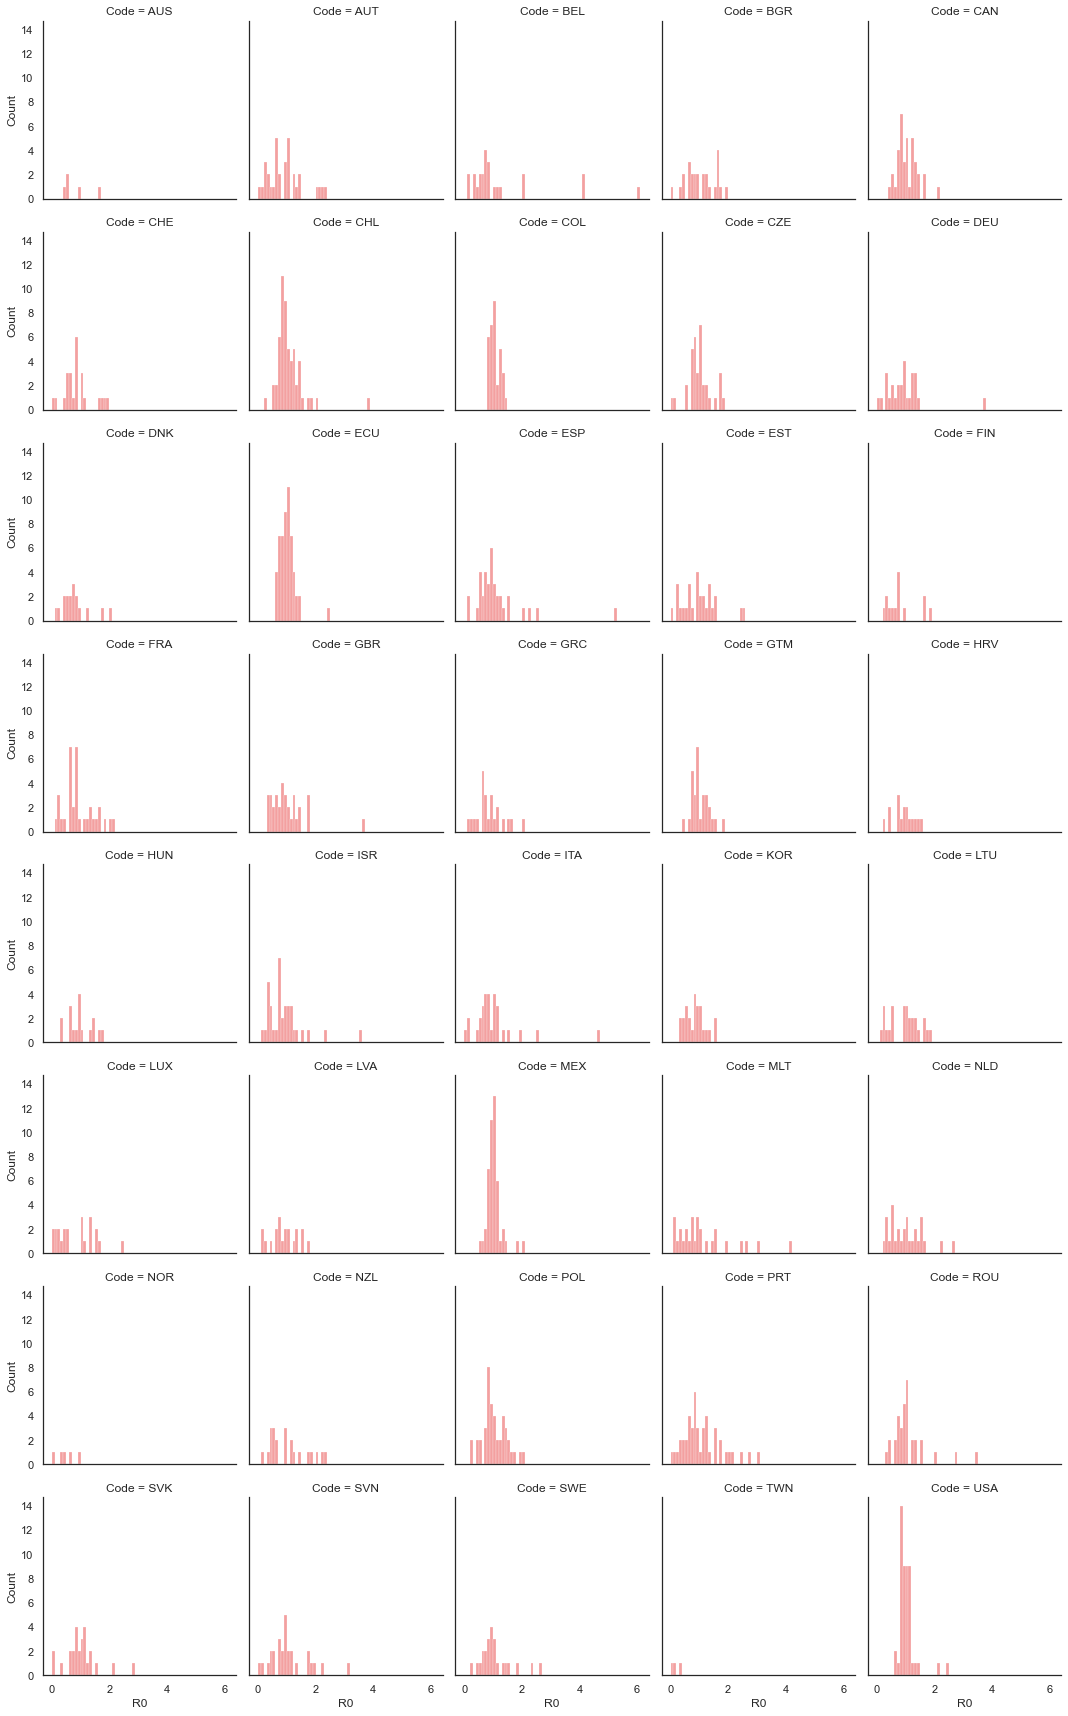

In [73]:
sns.displot(
    df, x="R0", col="Code", col_wrap=5, kind='hist',
    binwidth=0.1, height=3, color='lightcoral');
plt.tight_layout()

### Variation in deaths 'average_deaths_2015_2019_all_ages' per country

Text(0.5, 1.0, 'Variation of deaths raw')

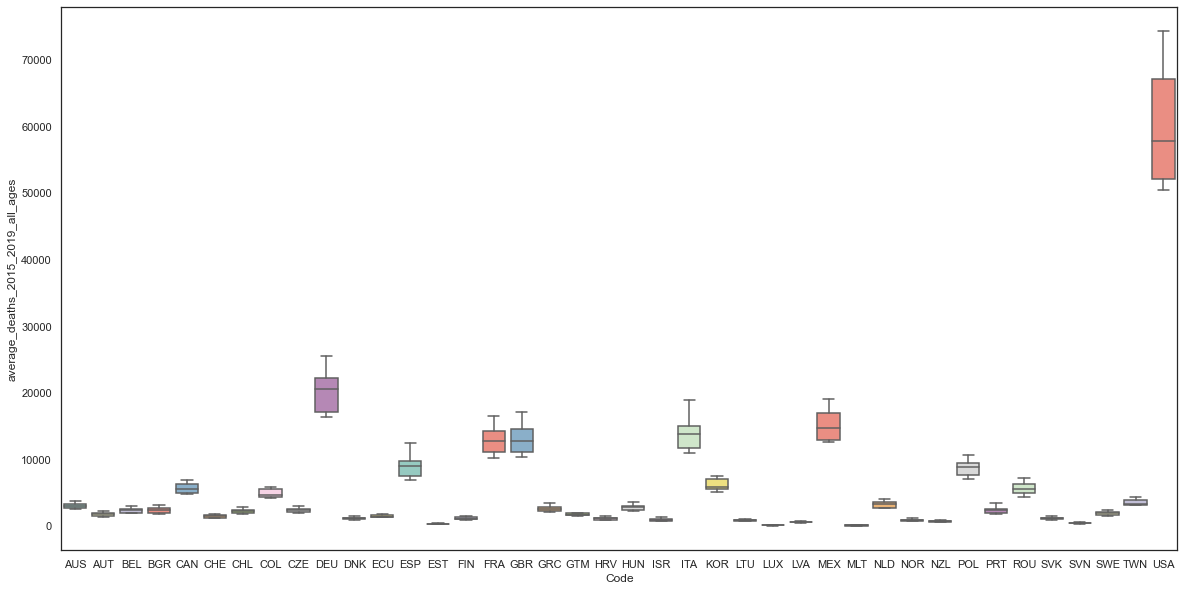

In [83]:
ax = sns.boxplot(x="Code", y="average_deaths_2015_2019_all_ages",
                 data=df, palette="Set3")
axes.set_title('Variation of deaths raw')

Text(0.5, 1.0, 'Variation of deaths normalized')

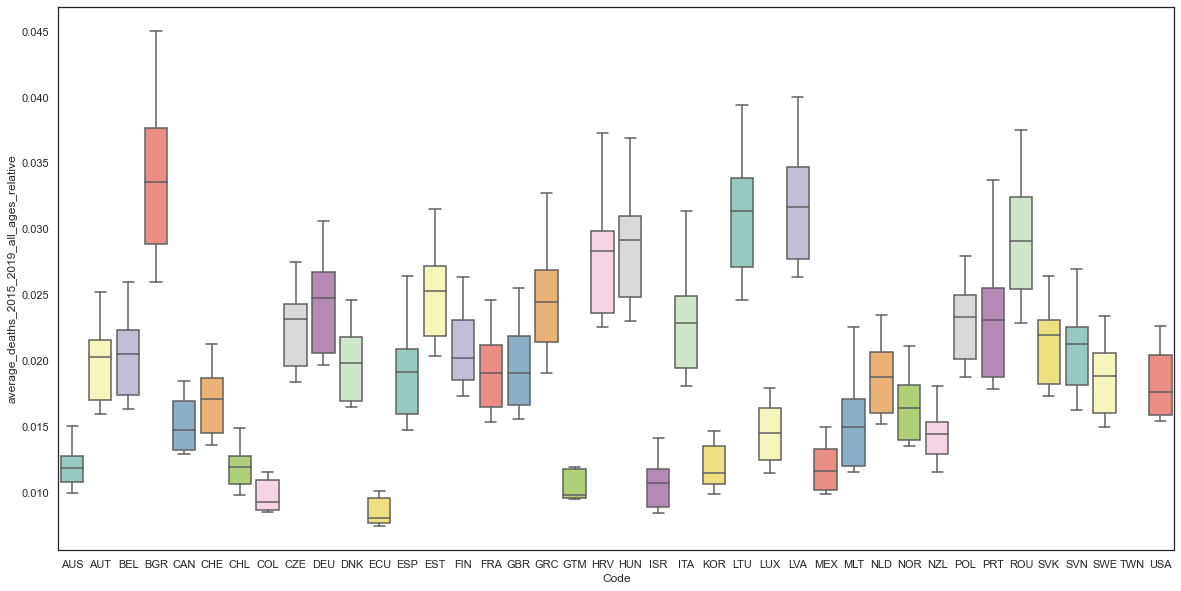

In [84]:
df['average_deaths_2015_2019_all_ages_relative']=100*df['average_deaths_2015_2019_all_ages']/df['population']
ax = sns.boxplot(x="Code", y="average_deaths_2015_2019_all_ages_relative",
                 data=df, palette="Set3")
axes.set_title('Variation of deaths normalized')

In [85]:
df['average_deaths_2015_2019_all_ages_relative'].describe()

count    2124.000000
mean        0.019811
std         0.007130
min         0.007454
25%         0.014622
50%         0.019043
75%         0.024252
max         0.044986
Name: average_deaths_2015_2019_all_ages_relative, dtype: float64

### Percentage of population greater than 65 per country

In [109]:
df_pop_gr_65=df[['Code','%df_population_gr_65']]
df_pop_gr_65=df_pop_gr_65.groupby(by=[df_pop_gr_65['Code']]).mean().reset_index().sort_values('%df_population_gr_65')

df_pop_gr_65_plot = alt.Chart(df_pop_gr_65).mark_bar().encode(
    x=alt.X('Code',
            sort=alt.Sort(field='%df_population_gr_65',
                         order='descending')
    ),
    y='%df_population_gr_65',
    tooltip='Code'
).properties(
    width=800
)
df_pop_gr_65_plot

alt.Chart(...)

### Restrictions

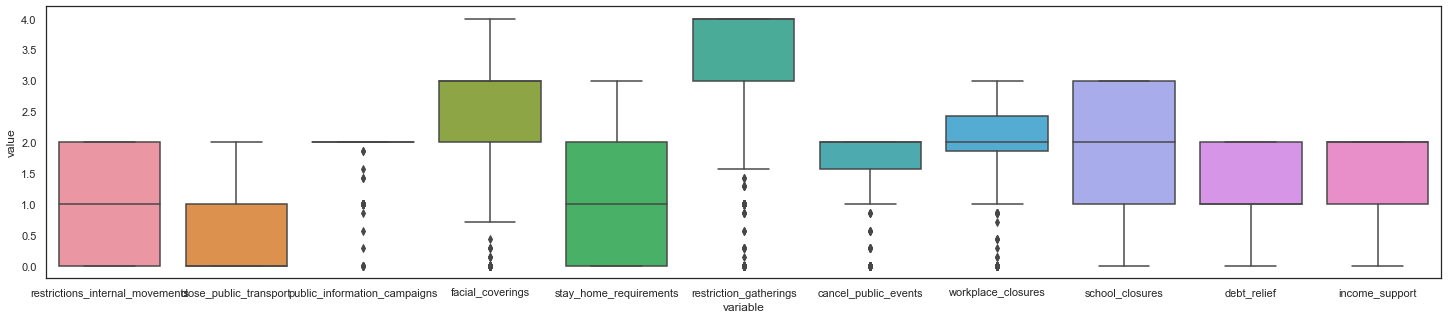

In [129]:
plt.subplots(figsize=(25,5))

df_restrictions=df[['restrictions_internal_movements', 'close_public_transport',
       'public_information_campaigns', 'facial_coverings',
       'stay_home_requirements', 'restriction_gatherings',
       'cancel_public_events', 'workplace_closures', 'school_closures',
       'debt_relief', 'income_support']]

sns.boxplot(x="variable", y="value",data=pd.melt(df_restrictions))
plt.show()

### Mobility Trends

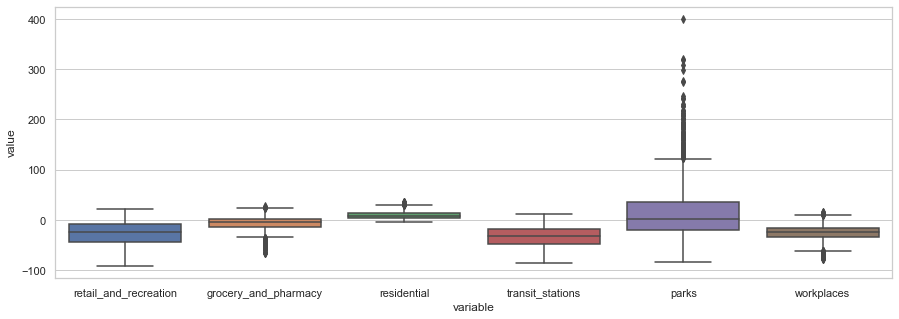

In [134]:
plt.subplots(figsize=(15,5))
sns.set_theme(style="whitegrid")

df_trends=df[['retail_and_recreation', 'grocery_and_pharmacy',
       'residential', 'transit_stations', 'parks', 'workplaces']]

sns.boxplot(x="variable", y="value",data=pd.melt(df_trends))
plt.show()

* All variables tend to have a small range of variables
* Variables parks, grocery_and_pharmacy and workplaces contain significant outliers

### Mobility Trends Pairplot

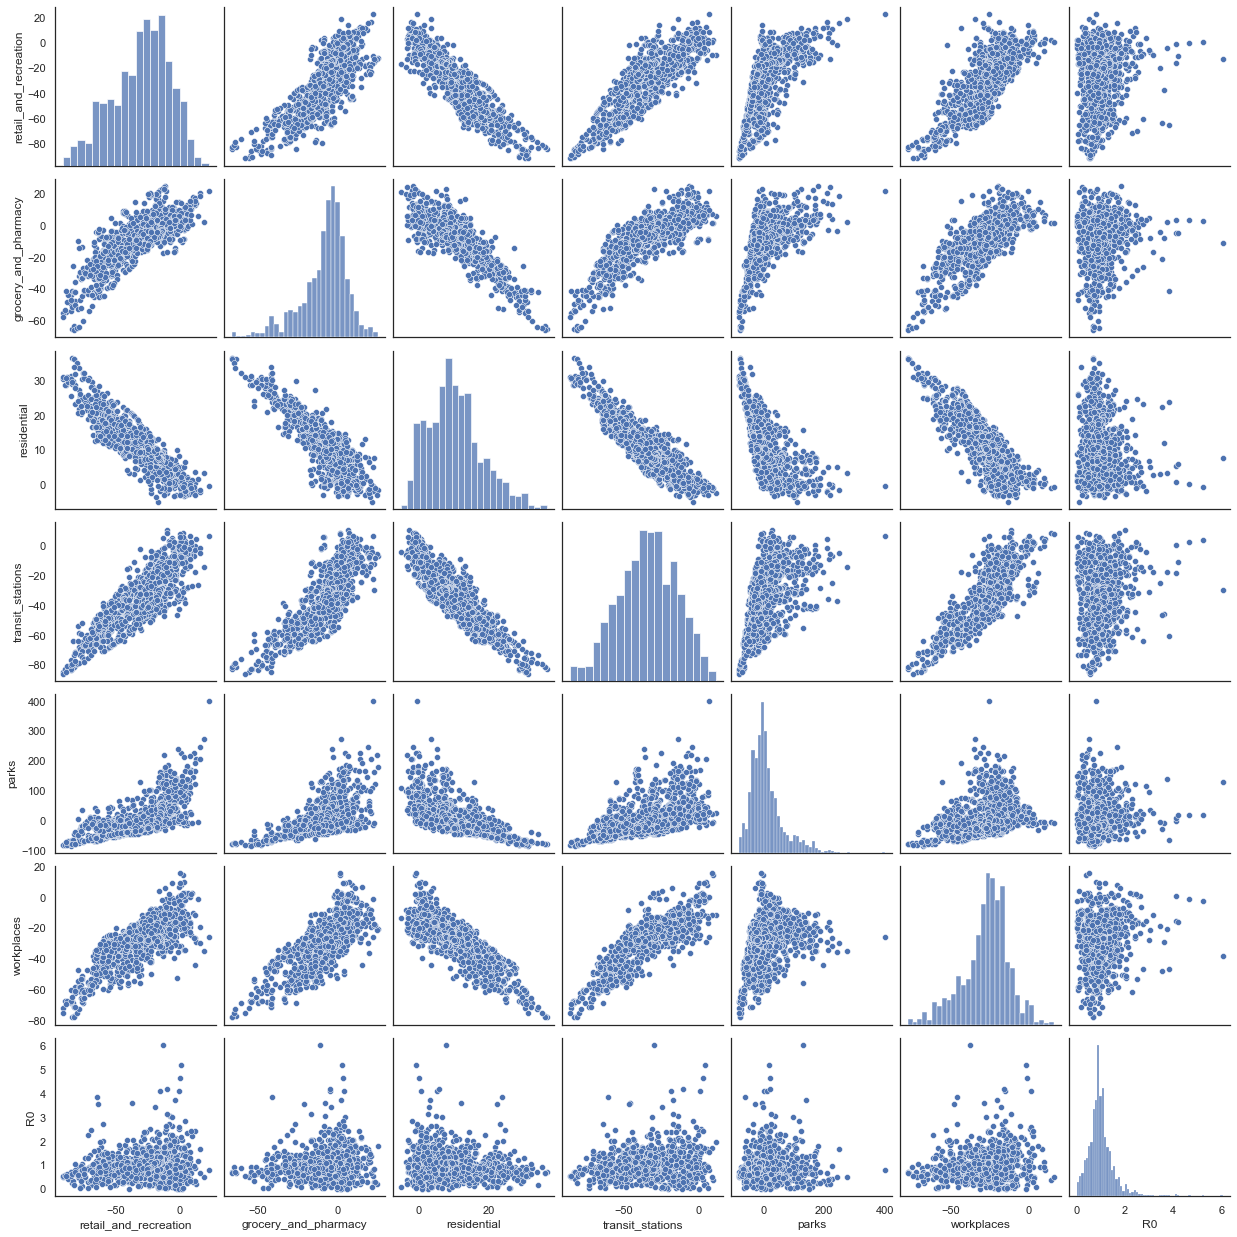

In [117]:
df_pairplot1=df[['retail_and_recreation', 'grocery_and_pharmacy',
       'residential', 'transit_stations', 'parks', 'workplaces', 'R0']]
sns.pairplot(df_pairplot1)

* All mobility trends tend to be highly correlated negatively or positively.
* Multicollinearity between mobility trends
* The distribution in most mobility trends tends to be slighty positevly and negatively skewed  sepcially grocery_and_pharmacy and parks

## Restrictions Relation with R0

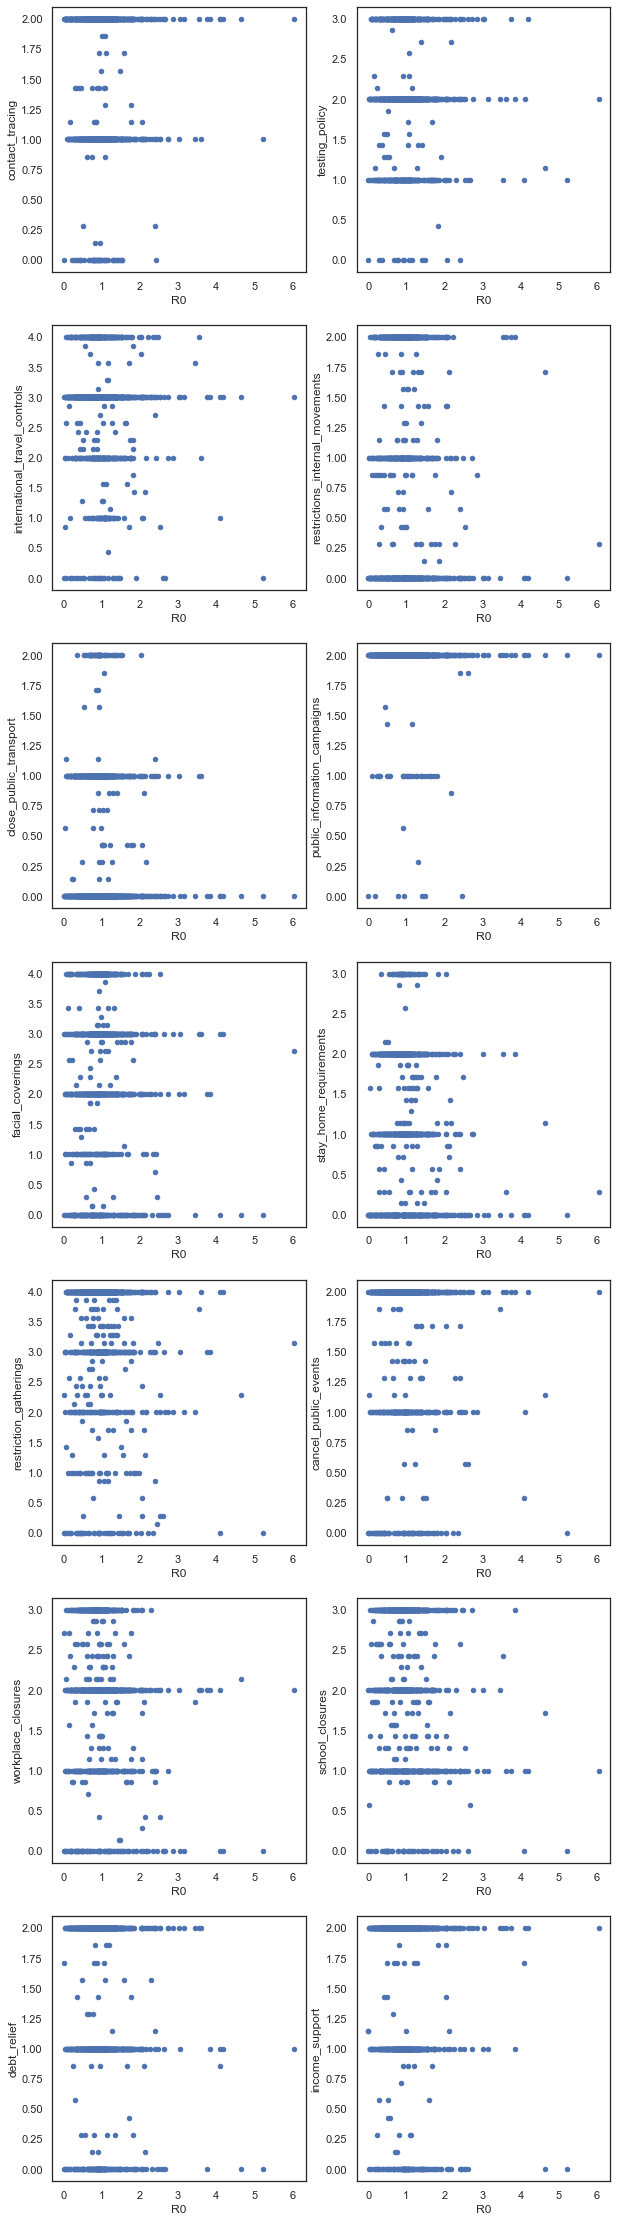

In [162]:
df_restrictions=df[['contact_tracing', 'testing_policy', 'international_travel_controls',
       'restrictions_internal_movements', 'close_public_transport',
       'public_information_campaigns', 'facial_coverings',
       'stay_home_requirements', 'restriction_gatherings',
       'cancel_public_events', 'workplace_closures', 'school_closures',
       'debt_relief', 'income_support']]

fig, axes = plt.subplots(7,2, figsize=(10, 40))

row=0
column=0
for restriction in df_restrictions.columns:
    df_pairplot_aux=df[[str(restriction), 'R0']]
    
    df_pairplot_aux.plot.scatter(x='R0',
        y=restriction,
        ax=axes[row][column])
    if(column==1):
        row = row + 1
    column = (column+1) % 2

## Accumulated deaths

<ipython-input-50-4a4b78cd9bea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc['Date'] = pd.to_datetime(df_acc['Date'])


<AxesSubplot:xlabel='Date'>

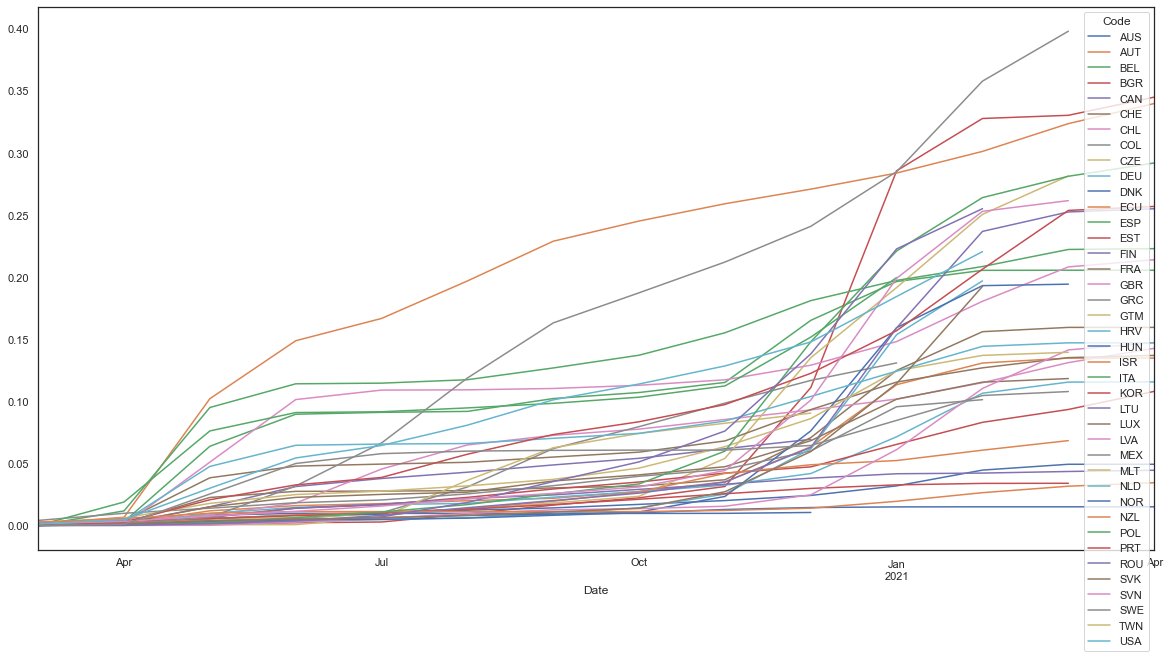

In [50]:
df_acc=df[['Code', 'Date', 'accumulated']]
df_acc['Date'] = pd.to_datetime(df_acc['Date'])
df_acc=df_acc.groupby(by=[df_acc['Date'].dt.to_period('m'), df_acc['Code']]).mean().reset_index()
df_acc=df_acc.pivot(index="Date",columns="Code",values="accumulated")
df_acc.plot()

* We can see that data from January 2021 tends to lack in terms of deaths, which is affecting the represented variable accumulated,therefore we won´t be able to include data from January in our Modelling stage
* We can see the different "waves" through time March-April and November-December

In [121]:
num_of_arrivals=df[['Code','number_of_arrivals']]
num_of_arrivals=num_of_arrivals.groupby(by=[num_of_arrivals['Code']]).mean().reset_index().sort_values('number_of_arrivals')

num_of_arrivals_plot = alt.Chart(num_of_arrivals).mark_bar().encode(color='Code',
    x=alt.X('Code',
            sort=alt.Sort(field='number_of_arrivals',
                         order='descending')
    ),
    y='number_of_arrivals',
    tooltip='Code'
).properties(
    width=800
)
num_of_arrivals_plot

alt.Chart(...)

### Number of nurses, doctors and beds per country

In [204]:
doctors_per_1000=df[['Code','doctors_per_1000']]
nurses_per_1000=df[['Code','nurses_per_1000']]
beds_per_1000=df[['Code','beds_per_1000']]

doctors_per_1000=doctors_per_1000.groupby(by=[doctors_per_1000['Code']])\
                                 .mean().reset_index().sort_values('doctors_per_1000')
nurses_per_1000=nurses_per_1000.groupby(by=[nurses_per_1000['Code']])\
                                 .mean().reset_index().sort_values('nurses_per_1000')
beds_per_1000=beds_per_1000.groupby(by=[beds_per_1000['Code']])\
                                 .mean().reset_index().sort_values('beds_per_1000')

doctors_per_1000_plot = alt.Chart(doctors_per_1000).mark_bar().encode(
    x=alt.X('Code',sort=alt.Sort(field='doctors_per_1000',order='descending')),
    y='doctors_per_1000',
    tooltip='Code').properties(width=800)

nurses_per_1000_plot = alt.Chart(nurses_per_1000).mark_bar().encode(
    x=alt.X('Code',sort=alt.Sort(field='nurses_per_1000',order='descending')),
    y='nurses_per_1000',
    tooltip='Code').properties(width=800)

beds_per_1000_plot = alt.Chart(beds_per_1000).mark_bar().encode(
    x=alt.X('Code',sort=alt.Sort(field='beds_per_1000',order='descending')),
    y='beds_per_1000',
    tooltip='Code').properties(width=800)

In [205]:
doctors_per_1000_plot

alt.Chart(...)

In [206]:
nurses_per_1000_plot

alt.Chart(...)

In [207]:
beds_per_1000_plot

alt.Chart(...)

## Countries included in the Analysis

In [211]:
def country_name(country):
    return pycountry.countries.get(alpha_3=country).name
def country_code_2_lower(country):
    return pycountry.countries.get(alpha_3=country).alpha_2.lower()

In [212]:
country_list=df.Code.unique()
country_names_list=[country_name(country) for country in country_list]
country_names_list_code2_lower=[country_code_2_lower(country) for country in country_list]

In [213]:
worldmap_chart = World()

worldmap_chart.title = 'Countries included in the analysis'

for i in range(len(country_names_list)):
    worldmap_chart.add(country_names_list[i], country_names_list_code2_lower[i])
    
worldmap_chart.render_to_file('mymap.html')

In [214]:
display(HTML(worldmap_chart.render(is_unicode=True)))